In [1]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"] = ""
import tensorflow as tf 
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import cv2
import utils_rgbd_object as ds

## Binocular Images 

In [2]:
data_dir = 'dataset/rgbd_object'
## pick 5 classes
class_set = ["camera", "flashlight", "lightbulb", "pitcher", "stapler"]
## pick all classes
# class_set = [os.path.basename(x) for x in glob.glob(data_dir+'/*')]

dataset = ds.get_data_from_file(class_set, data_dir)
train_dataset, test_dataset = ds.train_test_split(dataset, 3)
print("Train Dataset: {}".format(len(train_dataset)))
print("Test Dataset: {}".format(len(test_dataset)))

Train Dataset: 4597
Test Dataset: 9274


1 : camera has 1725 examples


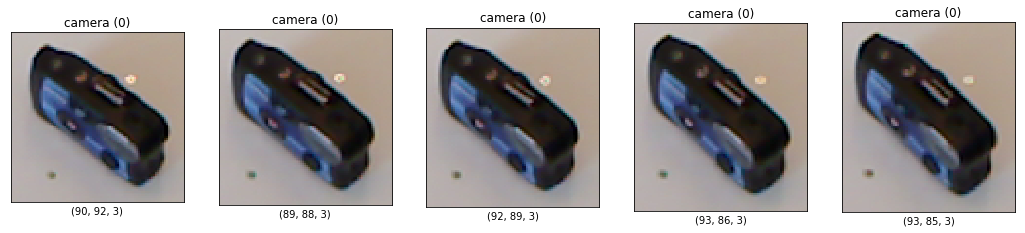

2 : flashlight has 2944 examples


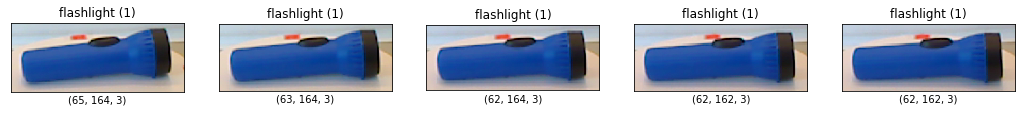

3 : lightbulb has 2446 examples


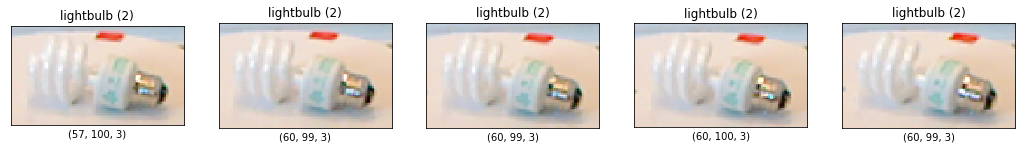

4 : pitcher has 1672 examples


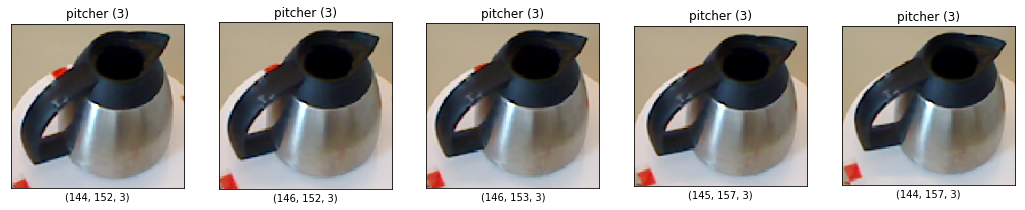

5 : stapler has 5084 examples


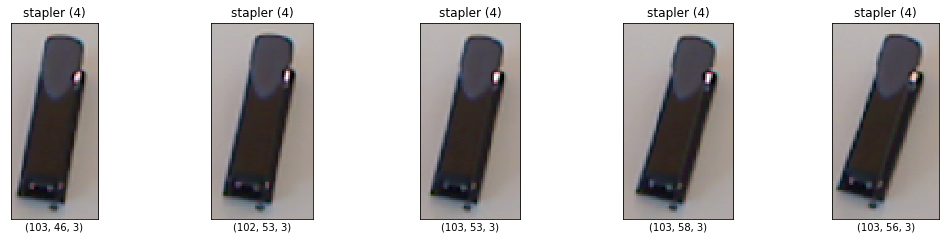

In [3]:
ds.get_dataset_info(dataset)

### Plot dataset in a row

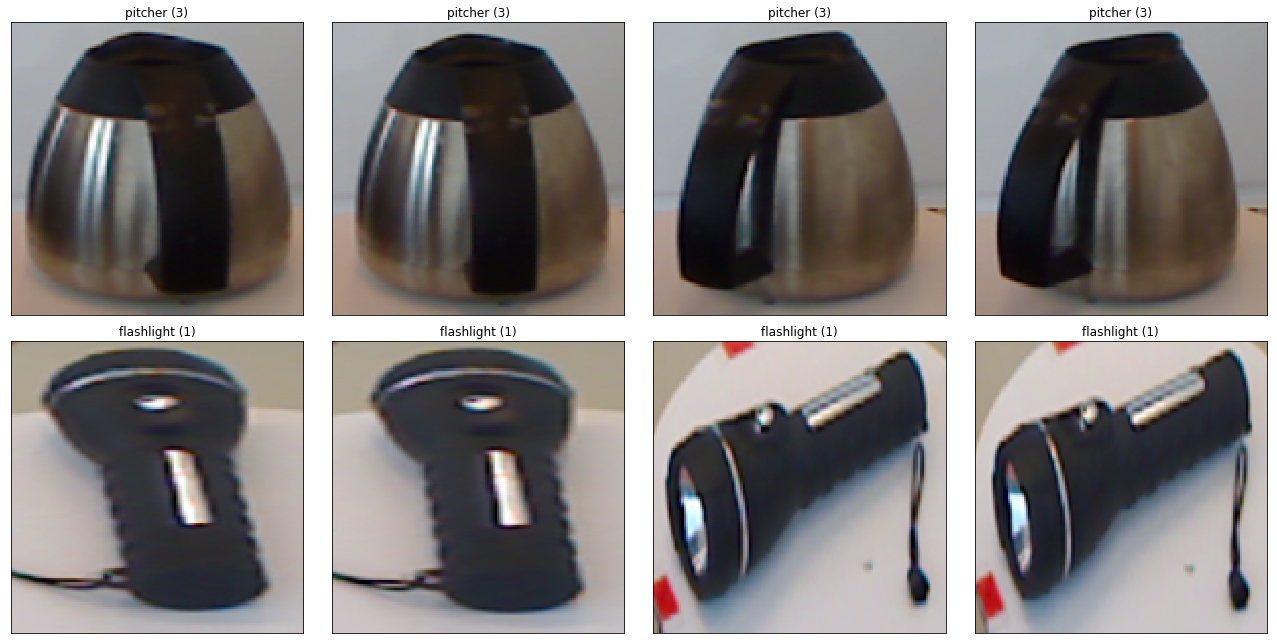

In [4]:
ds.plot_dataset(dataset)

# Previous Version (Monocular Images)

## Preprocessing from Raw data

In [2]:
from collections import defaultdict
def get_target_data(target_list):
    # input a target list
    target_dataset = defaultdict(list)
    for target in target_list:
        selected_dirs = glob.glob("cropped_data/" + target + "/*")
        for select_item in sorted(selected_dirs, key=lambda x: x.split("/")[-1].split("_")[-1]):
            dataset = glob.glob(select_item + "/*_crop.png")
            dataset = sorted(dataset, key=lambda x: (int(x.split("/")[-1].split("_")[2]), int(x.split("/")[-1].split("_")[3])))
            target_dataset[target].append(dataset)
    return target_dataset

In [3]:
# tareget classes: 
## camera, flashlight, lightbulb , pitcher, stapler
## <category>_<number>_<video>_<frame>_crop.png
class_set = [os.path.basename(x) for x in glob.glob("cropped_data/*")]
# class_set = ["camera", "flashlight", "lightbulb", "pitcher", "stapler"]
dataset = get_target_data(class_set)

# Monocular images

In [6]:
def plot_data_in_row(data, cat):
    fig, axes = plt.subplots(1, 5, figsize=(18, 3.6))
    axes = axes.flatten()
    for i in range(5):
        img = mpimg.imread(data[i*10])
        axes[i].imshow(img)
        axes[i].set_title("{}".format(cat))
        axes[i].set_xlabel("{}".format(img.shape))
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    plt.show()

# plot_data_in_row(dataset["stapler"][0], "stapler")
    
def get_dataset_info(dataset):
    # dataset is a dictionary which records category and its data.
    for cat, data_list in dataset.items():
        examples_per_instance = [len(data) for data in data_list]
        print("{} has {} instances: {} = {}".format(cat, len(examples_per_instance),
                                                    " + ".join(str(x) for x in examples_per_instance),
                                                   sum(examples_per_instance)))
        plot_data_in_row(data_list[0], cat)
        

In [25]:
calculator = dataset['flashlight'][0]
coffee_mug = dataset['coffee_mug'][0]

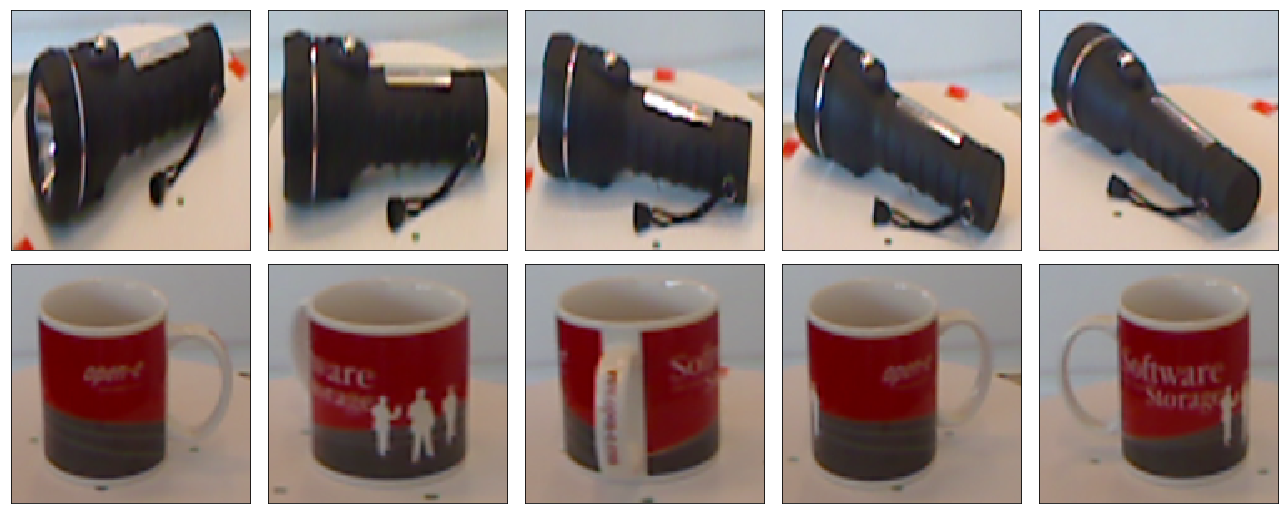

In [83]:
from PIL import Image
fig, axes = plt.subplots(2, 5, figsize=(18, 7.2))
axes = axes.flatten()
for i in range(5):
    img = np.array(imageio.imread(calculator[i*10]))
    img = cv2.resize(img, (144, 144))
    axes[i].imshow(img)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
for i in range(5):
    img = np.array(imageio.imread(coffee_mug[i*10]))
    img = cv2.resize(img, (144, 144))
    axes[i+5].imshow(img)
    axes[i+5].set_xticks([])
    axes[i+5].set_yticks([])
plt.tight_layout()
plt.savefig("figure/rgbd-dataset.pdf", dpi=300)
plt.show()

binder has 3 instances: 710 + 692 + 727 = 2129


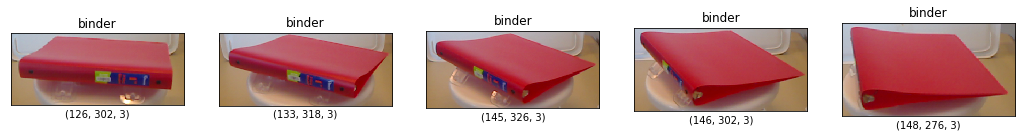

calculator has 5 instances: 580 + 632 + 604 + 561 + 557 = 2934


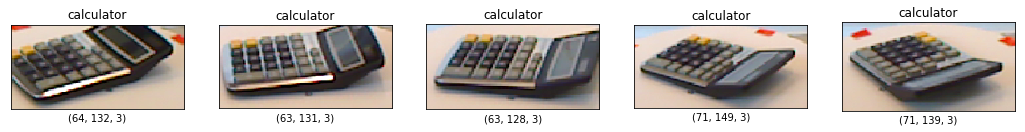

bell_pepper has 6 instances: 634 + 658 + 631 + 636 + 607 + 618 = 3784


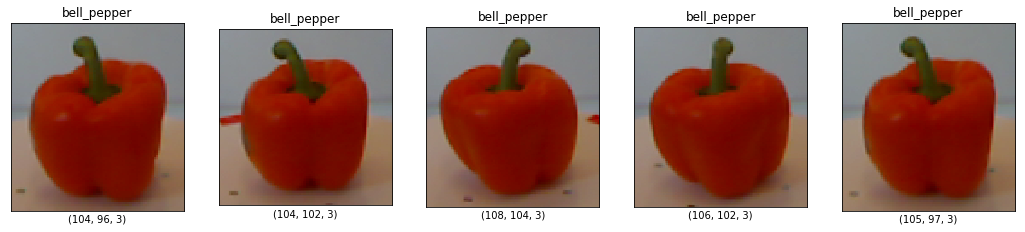

camera has 3 instances: 623 + 573 + 529 = 1725


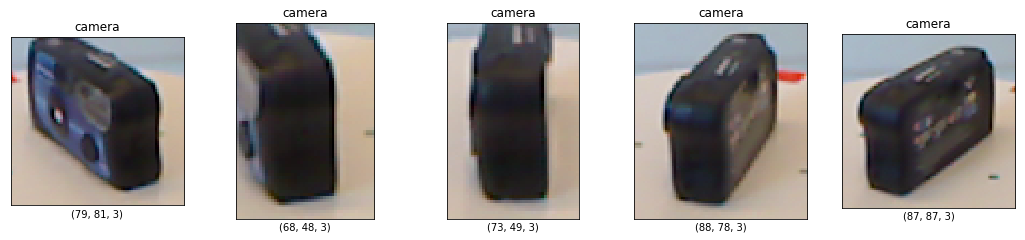

cap has 4 instances: 628 + 668 + 620 + 635 = 2551


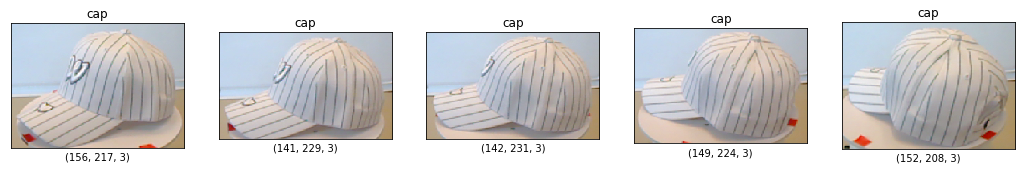

cell_phone has 5 instances: 544 + 536 + 545 + 542 + 545 = 2712


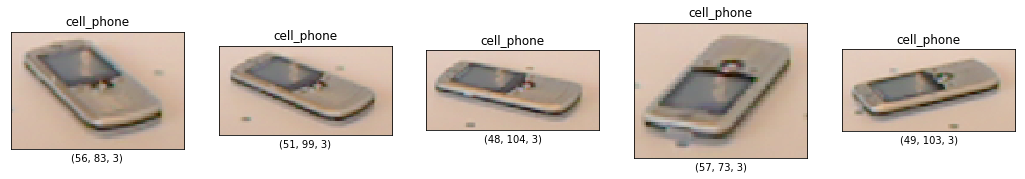

cereal_box has 5 instances: 570 + 607 + 615 + 595 + 542 = 2929


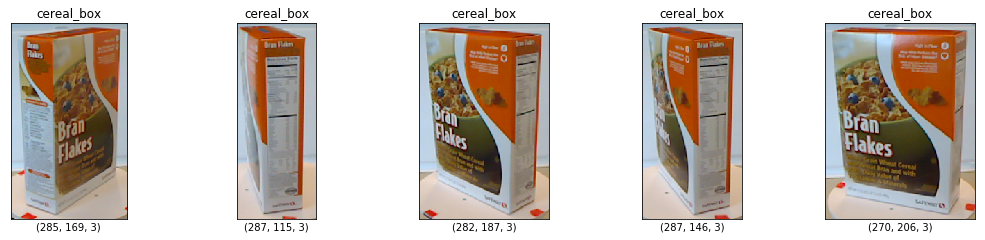

coffee_mug has 8 instances: 548 + 555 + 553 + 543 + 534 + 541 + 806 + 786 = 4866


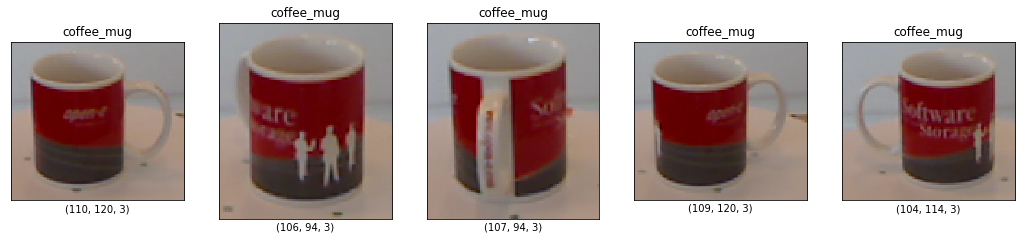

comb has 4 instances: 565 + 579 + 605 + 584 = 2333


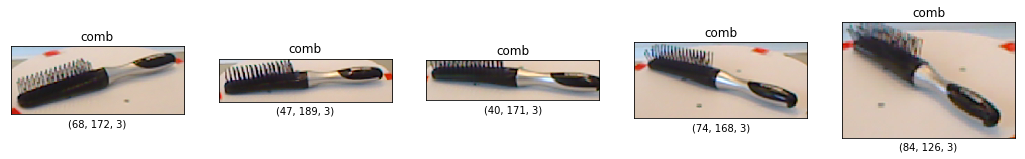

dry_battery has 6 instances: 567 + 555 + 545 + 569 + 526 + 533 = 3295


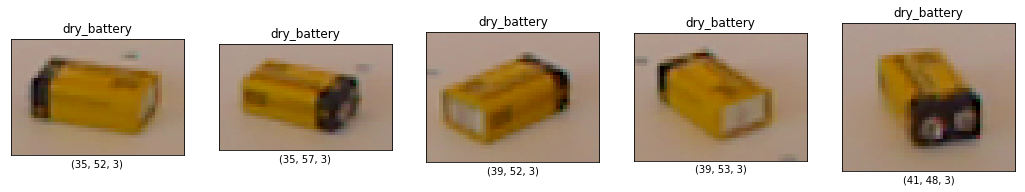

flashlight has 5 instances: 605 + 602 + 588 + 566 + 583 = 2944


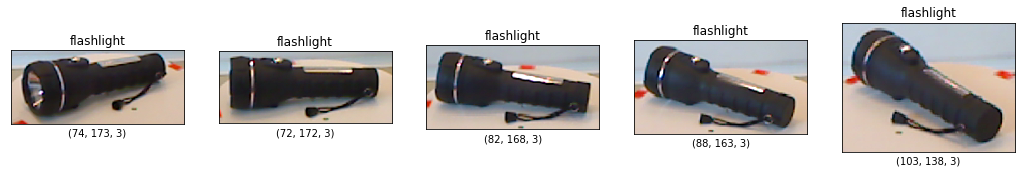

food_bag has 8 instances: 788 + 794 + 782 + 798 + 786 + 790 + 792 + 772 = 6302


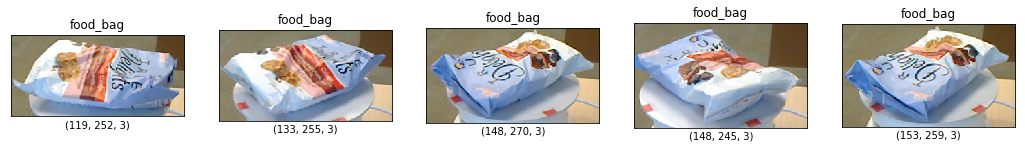

food_box has 12 instances: 787 + 800 + 782 + 789 + 803 + 779 + 825 + 822 + 771 + 797 + 788 + 781 = 9524


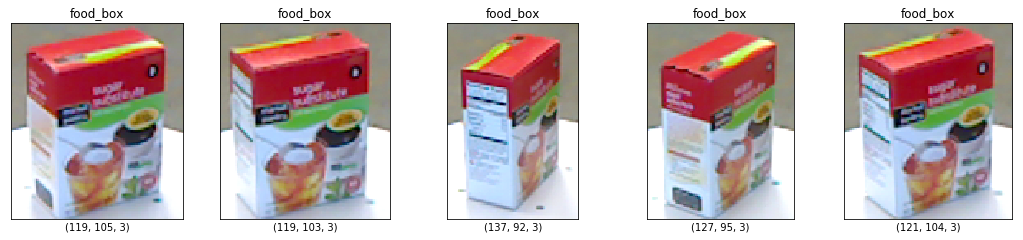

food_can has 14 instances: 822 + 777 + 801 + 774 + 822 + 790 + 804 + 785 + 810 + 777 + 774 + 812 + 789 + 781 = 11118


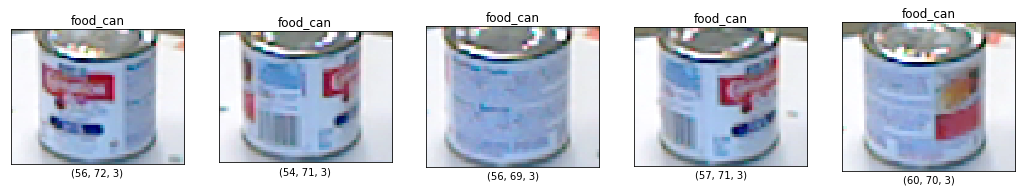

food_cup has 5 instances: 786 + 810 + 806 + 810 + 798 = 4010


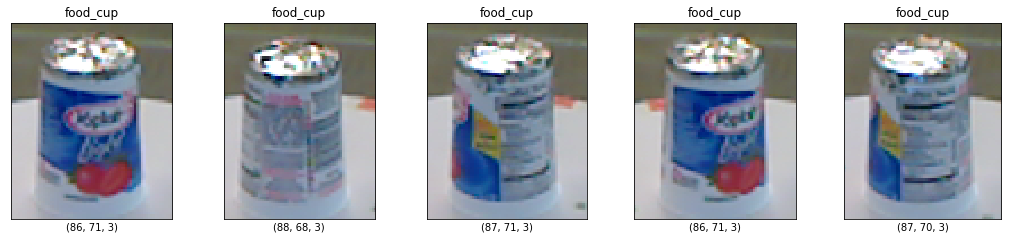

food_jar has 6 instances: 768 + 805 + 788 + 806 + 780 + 837 = 4784


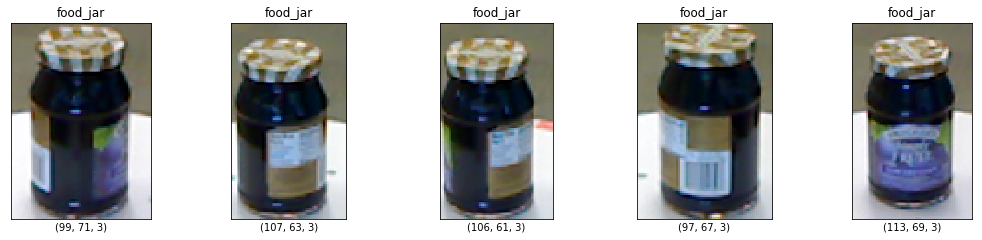

garlic has 7 instances: 780 + 798 + 789 + 789 + 793 + 784 + 801 = 5534


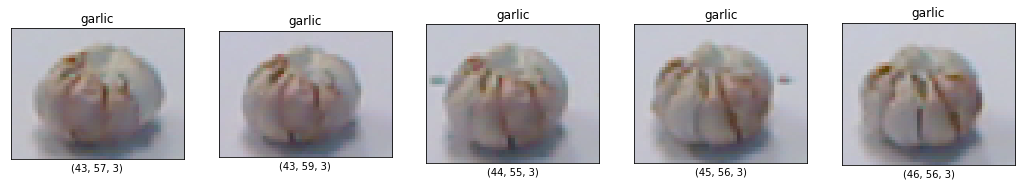

glue_stick has 6 instances: 801 + 773 + 756 + 773 + 797 + 777 = 4677


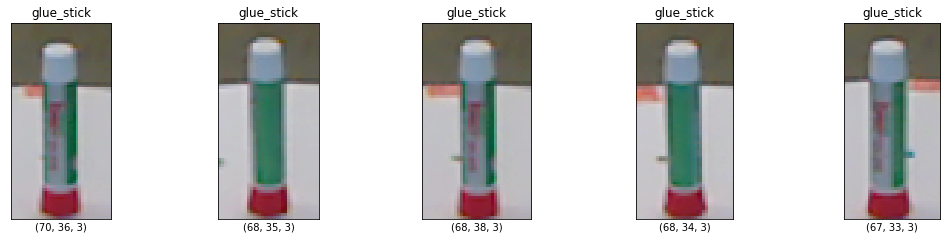

greens has 4 instances: 728 + 658 + 719 + 755 = 2860


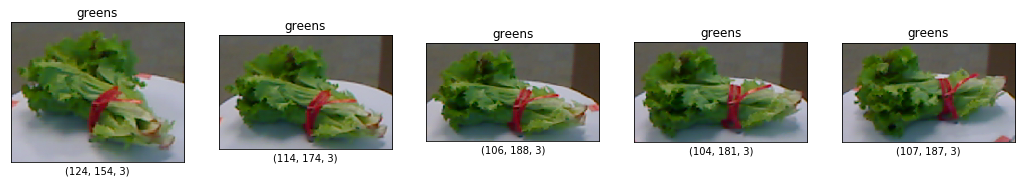

ball has 7 instances: 820 + 783 + 809 + 800 + 794 + 792 + 763 = 5561


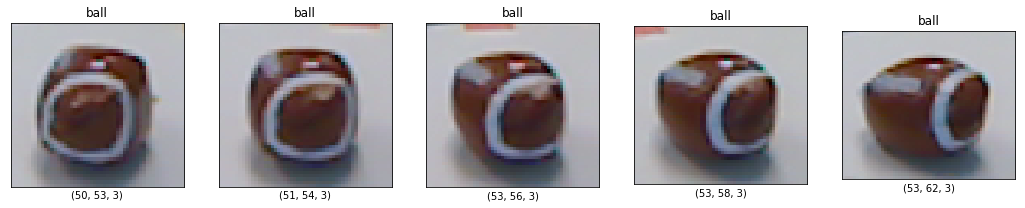

hand_towel has 5 instances: 783 + 772 + 797 + 794 + 786 = 3932


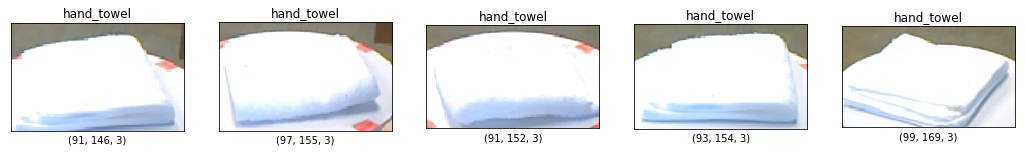

keyboard has 5 instances: 709 + 586 + 562 + 524 + 547 = 2928


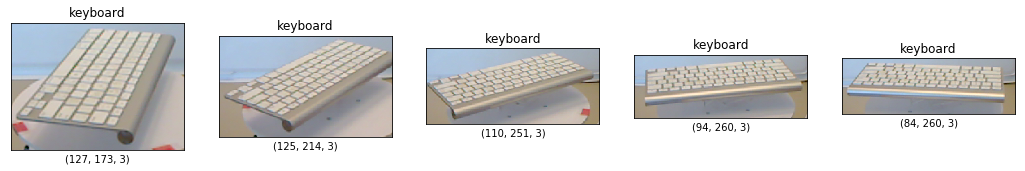

kleenex has 5 instances: 776 + 784 + 804 + 645 + 813 = 3822


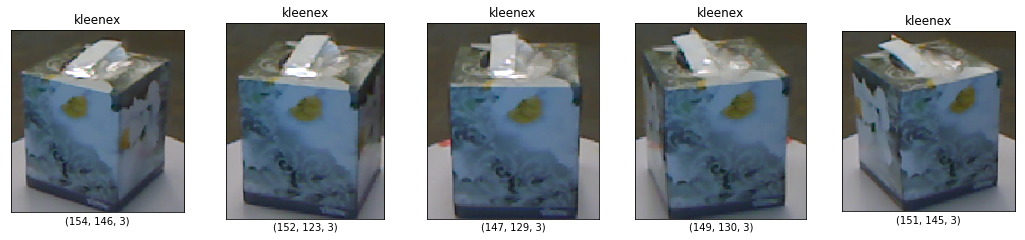

instant_noodles has 8 instances: 771 + 787 + 803 + 801 + 793 + 814 + 780 + 769 = 6318


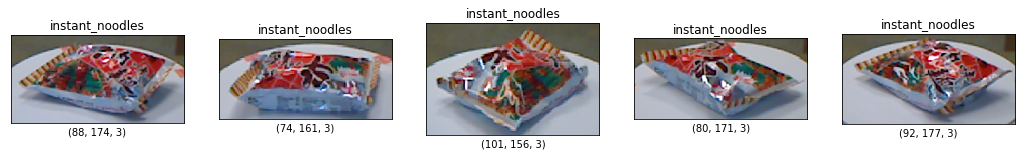

lemon has 6 instances: 593 + 666 + 614 + 602 + 654 + 618 = 3747


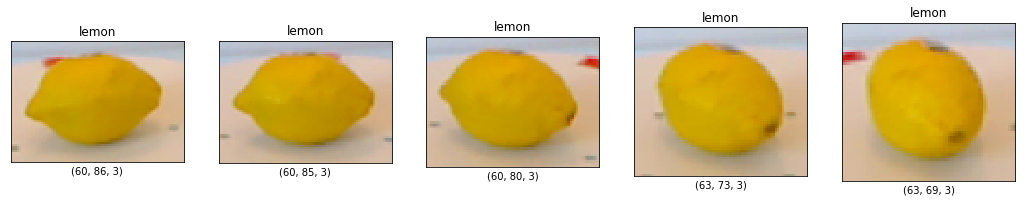

lightbulb has 4 instances: 615 + 578 + 619 + 634 = 2446


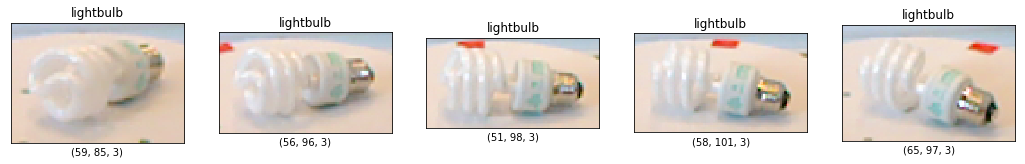

lime has 4 instances: 630 + 640 + 602 + 642 = 2514


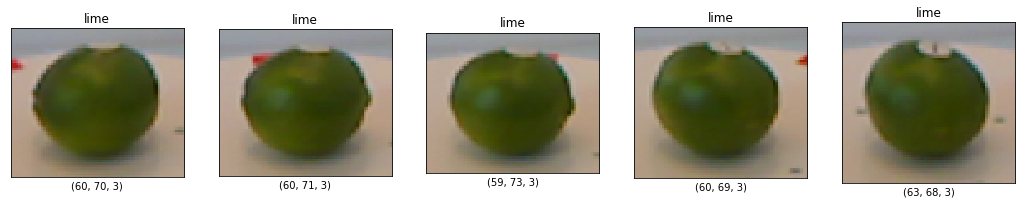

marker has 9 instances: 806 + 810 + 761 + 789 + 786 + 807 + 689 + 720 + 676 = 6844


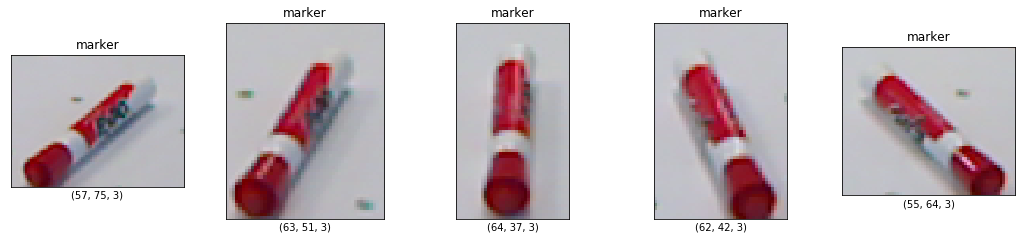

mushroom has 3 instances: 778 + 759 + 742 = 2279


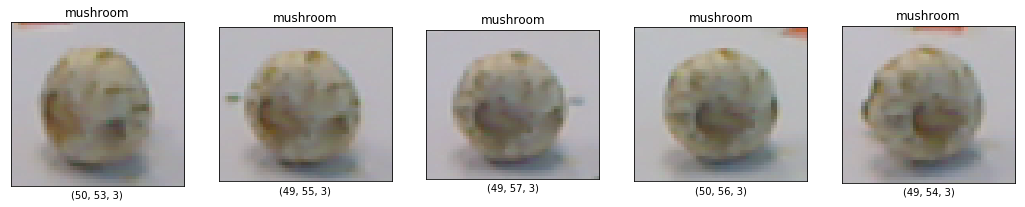

apple has 5 instances: 607 + 622 + 607 + 633 + 629 = 3098


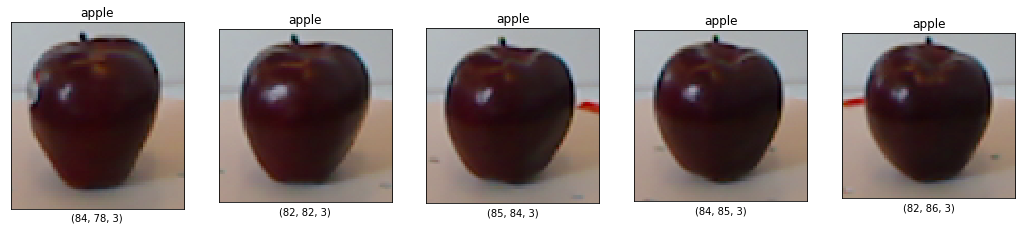

notebook has 5 instances: 798 + 774 + 810 + 793 + 805 = 3980


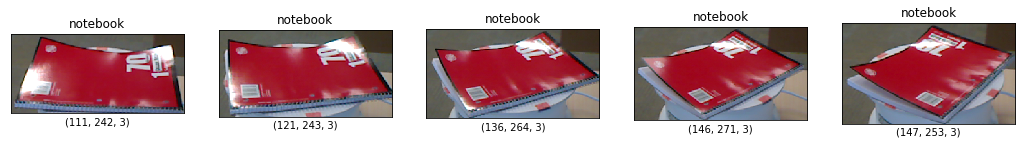

onion has 6 instances: 772 + 767 + 792 + 770 + 797 + 789 = 4687


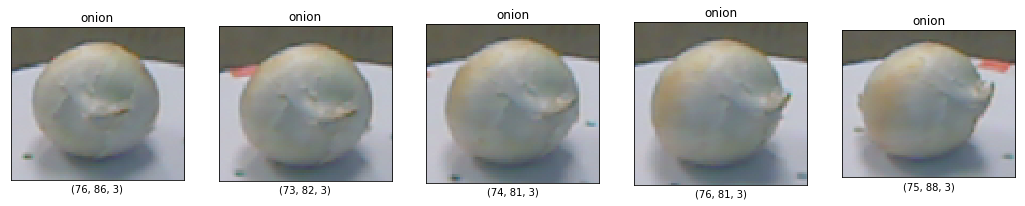

orange has 4 instances: 710 + 713 + 707 + 704 = 2834


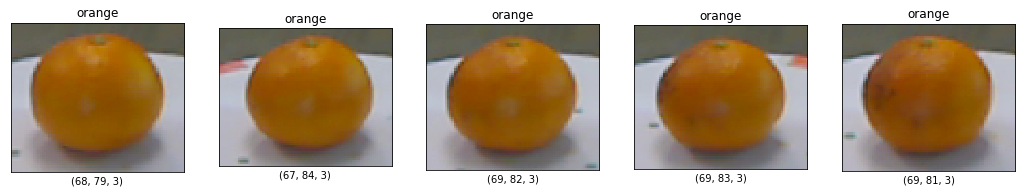

peach has 3 instances: 674 + 704 + 701 = 2079


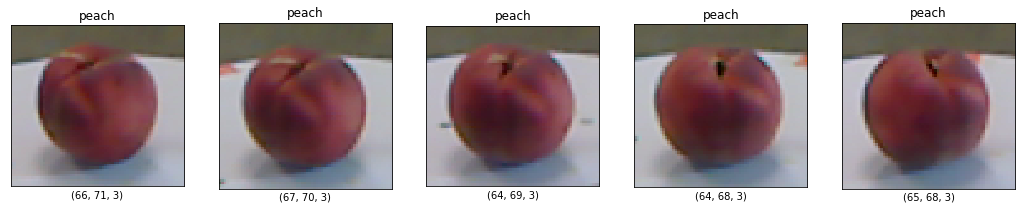

pitcher has 3 instances: 566 + 549 + 557 = 1672


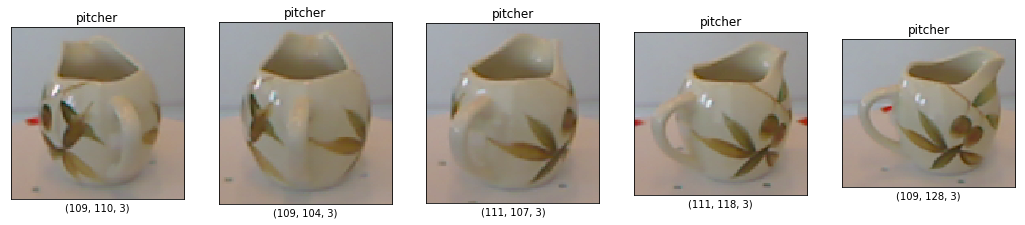

plate has 7 instances: 712 + 675 + 506 + 675 + 565 + 557 + 699 = 4389


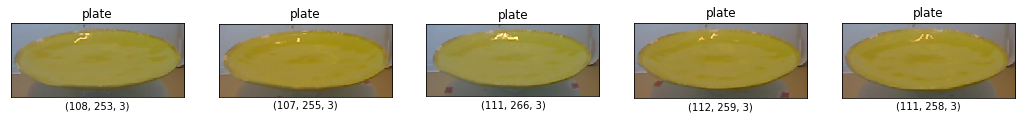

pear has 6 instances: 674 + 669 + 683 + 664 + 761 + 735 = 4186


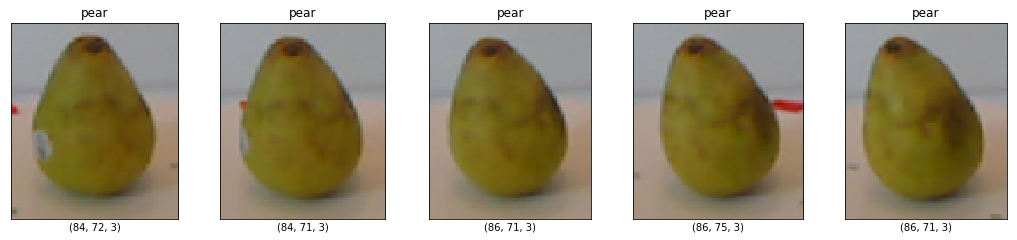

potato has 6 instances: 599 + 595 + 634 + 621 + 619 + 630 = 3698


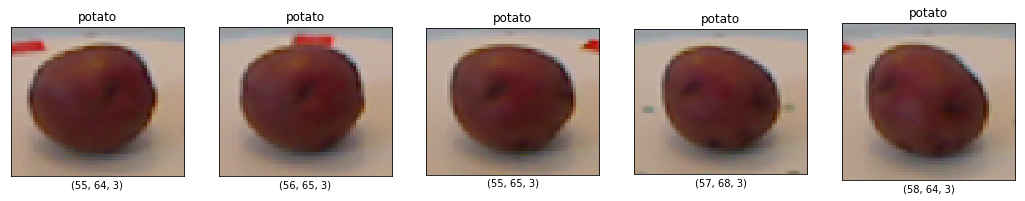

pliers has 6 instances: 590 + 578 + 562 + 576 + 583 + 599 = 3488


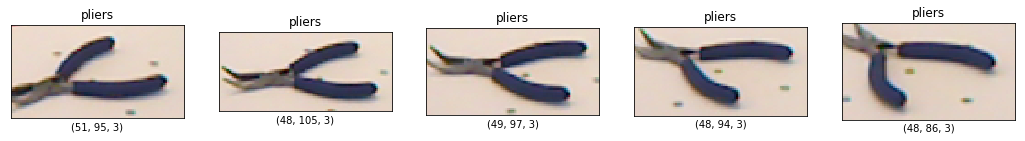

rubber_eraser has 4 instances: 784 + 781 + 772 + 790 = 3127


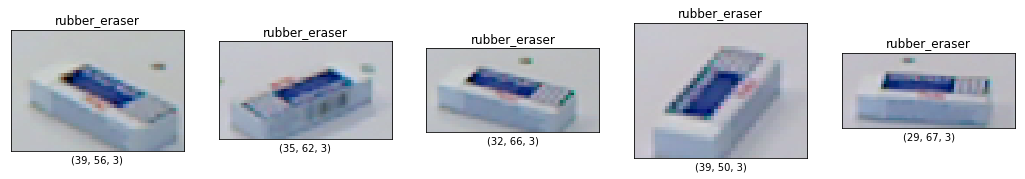

scissors has 4 instances: 625 + 562 + 601 + 583 = 2371


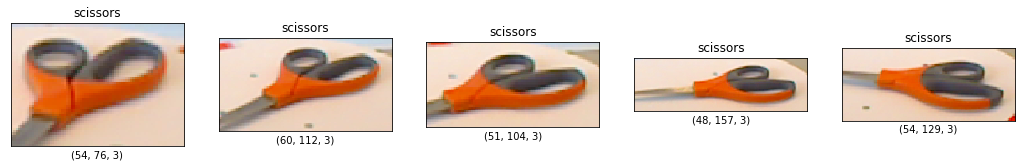

shampoo has 6 instances: 782 + 783 + 833 + 852 + 773 + 799 = 4822


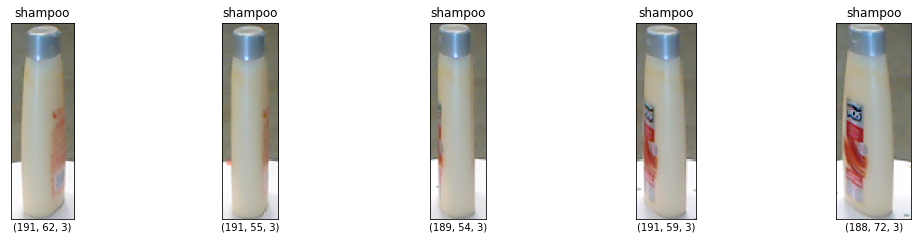

banana has 4 instances: 726 + 714 + 699 + 687 = 2826


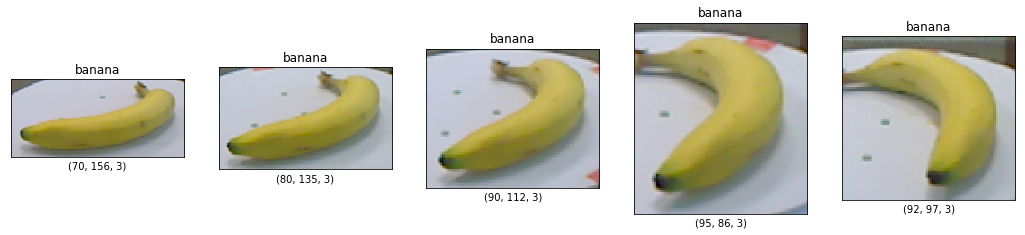

soda_can has 6 instances: 628 + 586 + 561 + 606 + 589 + 585 = 3555


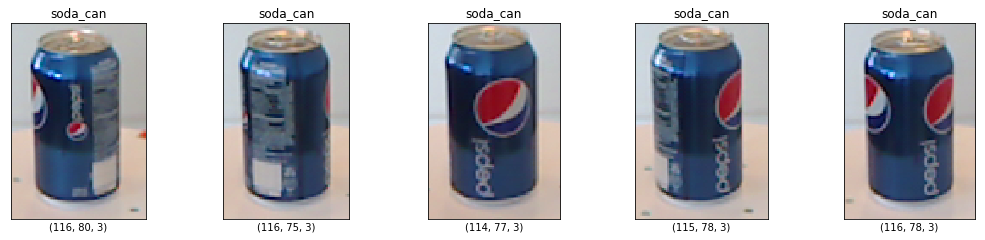

sponge has 12 instances: 631 + 785 + 780 + 777 + 589 + 610 + 632 + 795 + 807 + 768 + 802 + 799 = 8775


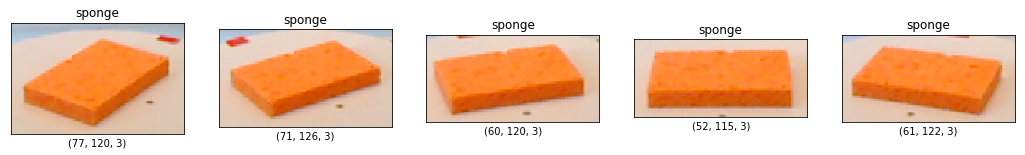

stapler has 8 instances: 595 + 578 + 577 + 586 + 580 + 561 + 823 + 784 = 5084


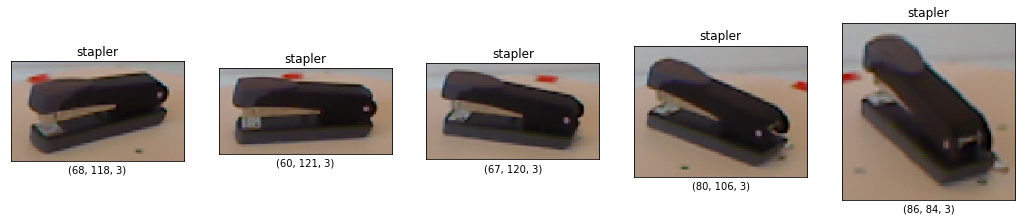

tomato has 8 instances: 681 + 634 + 621 + 588 + 690 + 663 + 660 + 700 = 5237


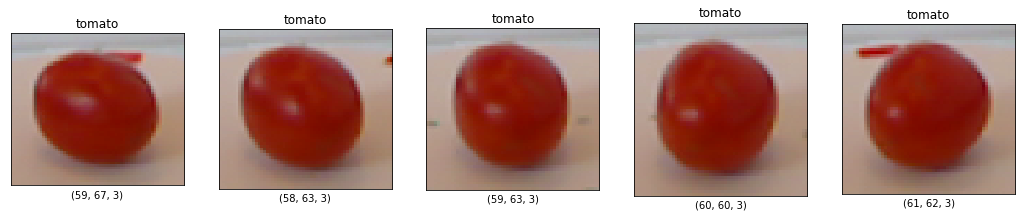

toothbrush has 5 instances: 595 + 605 + 600 + 583 + 585 = 2968


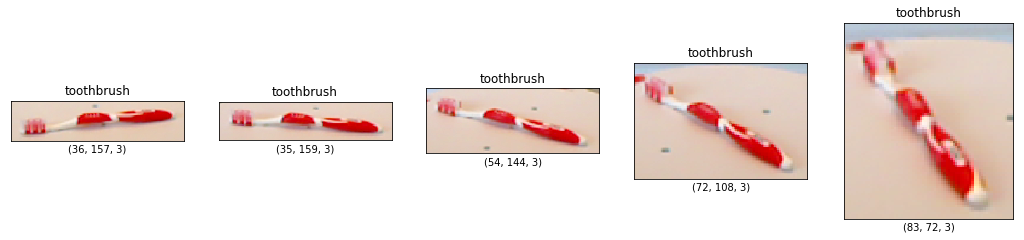

toothpaste has 5 instances: 813 + 805 + 847 + 813 + 789 = 4067


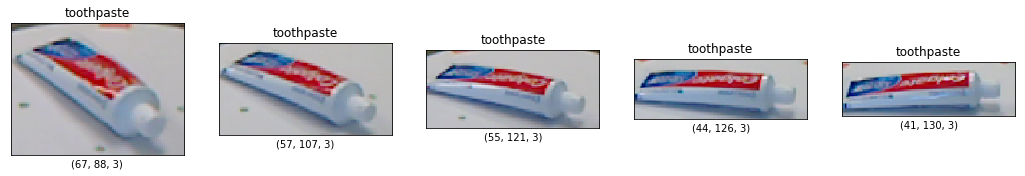

bowl has 6 instances: 580 + 582 + 580 + 554 + 806 + 782 = 3884


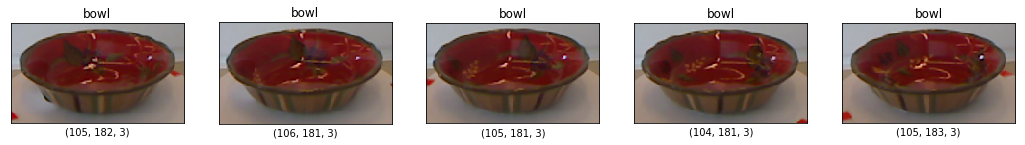

water_bottle has 9 instances: 561 + 785 + 532 + 568 + 559 + 562 + 582 + 768 + 774 = 5691


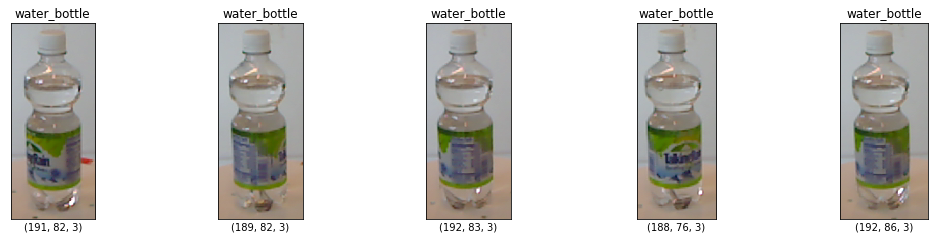

In [9]:
get_dataset_info(dataset)

In [10]:
import random
def train_test_split(dataset):
    train_data = []
    test_data = []
    
    for data_list in dataset:
        cat_data = []
        print(data_list)
        for data in dataset[data_list]:
            v_data = defaultdict(list)
            for file in data:
                video_num = file.split("/")[-1].split("_")[2]
                v_data[video_num].append(file)
            
            for k, v in v_data.items():
                train_data.extend(v[:len(v)//3])
                test_data.extend([x for x in v if x not in train_data])   
    val_data = [train_data[i] for i in random.sample(range(len(train_data)), len(train_data)//10)]
    print("train_data: {} / test_data: {}".format(len(train_data), len(test_data)))
    return train_data, test_data

In [11]:
train, test = train_test_split(dataset)

binder
calculator
bell_pepper
camera
cap
cell_phone
cereal_box
coffee_mug
comb
dry_battery
flashlight
food_bag
food_box
food_can
food_cup
food_jar
garlic
glue_stick
greens
ball
hand_towel
keyboard
kleenex
instant_noodles
lemon
lightbulb
lime
marker
mushroom
apple
notebook
onion
orange
peach
pitcher
plate
pear
potato
pliers
rubber_eraser
scissors
shampoo
banana
soda_can
sponge
stapler
tomato
toothbrush
toothpaste
bowl
water_bottle
train_data: 69077 / test_data: 138843


In [12]:
def get_labels(data, class_set):
    labels = []
    flag = 0
    for label, cls in enumerate(class_set):
        for img in data[flag:]:
            if cls in img:
                labels.append(label)
                flag += 1
            else:
                break
    return labels

In [13]:
train_label = get_labels(train, class_set)
test_label = get_labels(test, class_set)
print("train_label: {} / test_label: {}".format(len(train_label), len(test_label)))

train_label: 69077 / test_label: 138843


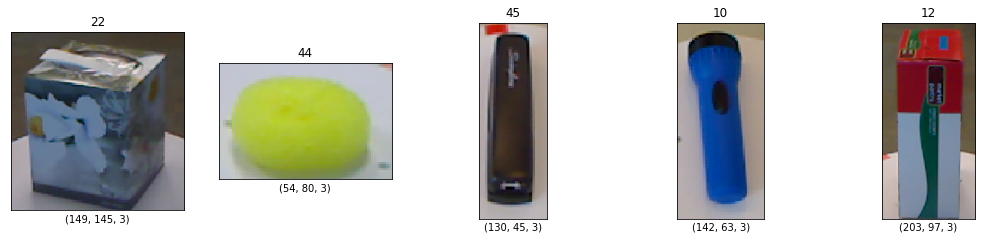

In [14]:
## sanity check 
num_samples = 5
sampled_idx = random.sample(range(len(train)), num_samples)
fig, axes = plt.subplots(1, 5, figsize=(18, 3.6))
axes = axes.flatten()
for i, sample in enumerate(sampled_idx):
    img = mpimg.imread(train[sample])
    axes[i].imshow(img)
    axes[i].set_title("{}".format(train_label[sample]))
    axes[i].set_xlabel("{}".format(img.shape))
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.show()

## Resize image

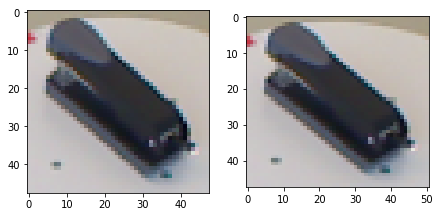

In [11]:
# resize image by specific size
def resize_image_specific_size(image, size):
    resized_img = tf.image.resize_images(image, size)
    return resized_img

# resize image and keep the aspect ratio
def resize_image_keep_aspect(image, lo_dim):
    # Take width/height
    initial_width = tf.shape(image)[0]
    initial_height = tf.shape(image)[1]

    # Take the greater value, and use it for the ratio
    min_ = tf.minimum(initial_width, initial_height)
    ratio = tf.to_float(min_) / tf.constant(lo_dim, dtype=tf.float32)

    new_width = tf.to_int32(tf.to_float(initial_width) / ratio)
    new_height = tf.to_int32(tf.to_float(initial_height) / ratio)

    return tf.image.resize_images(image, [new_width, new_height])

img = train[random.sample(range(len(train)), 1)[0]]
img = mpimg.imread(img)

sess = tf.Session()
specific_size_img_ = resize_image_specific_size(img, (48, 48))
same_aspect_img_ = resize_image_keep_aspect(img, 48)

specific_size_img = sess.run(specific_size_img_)
same_aspect_img = sess.run(same_aspect_img_)

fig, axes = plt.subplots(1, 2, figsize=(7.2, 3.6))
axes = axes.flatten()
axes[0].imshow(specific_size_img)
axes[1].imshow(same_aspect_img)
plt.show()